<a href="https://colab.research.google.com/github/bndk97/fractal-notebook/blob/main/Fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mandelbrot and Julia fractals.

https://julia-to-mandelbrot.think.somethingorotherwhatever.com/?x=0.07968747615814215&y=-0.6324013593371864

https://www.youtube.com/watch?v=0OP9guFmWfs&list=LL

In [127]:
import math
from matplotlib import pyplot as plt
from numpy import linspace

In [128]:
EPSILON = 1e-100

In [129]:
class Complex:
  def __init__(self, real: float, imag: float):
    self.real = real
    self.imag = imag
    try:
      self.abs = math.sqrt(self.real ** 2 + self.imag ** 2)
    except Exception as e:
      self.abs = 0
      print(e)
      print(self)


  def __add__(self, z):
    return Complex(self.real + z.real, self.imag + z.imag)

  def __sub__(self, z):
    return Complex(self.real - z.real, self.imag - z.imag)

  def __mul__(self, z):
    return Complex(self.real * z.real - self.imag * z.imag, self.real * z.imag + self.imag * z.real)

  def __str__(self):
    return f"{self.real} + {self.imag}i" if self.imag >=0 else f"{self.real} - {self.imag}i"

def plot_complex(z: Complex):
  plt.figure()
  plt.plot(z.real, z.imag, 'r*')
  plt.show()

In [130]:
def rule(z: Complex, c: Complex):
  return z * z * z + c

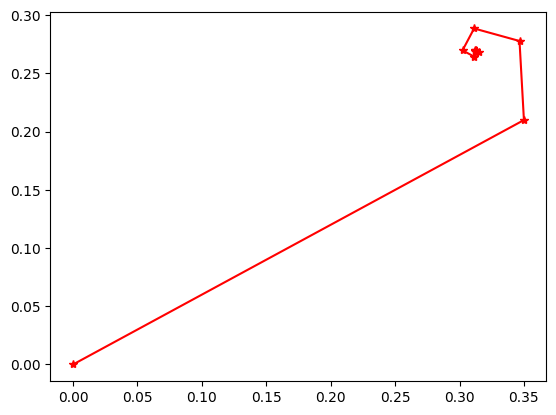

In [131]:
def iterate(z: Complex, c: Complex, iter: int):
  for i in range(0, iter):
    z = rule(z, c)
    if z.abs < EPSILON:
      break
  return z

def iterate_and_plot(z: Complex, c: Complex, iter: int):
  z_values = []

  z_values.append(z)
  for i in range(0, iter):
    z = rule(z, c)
    if z.abs < EPSILON:
      break
    z_values.append(z)
    # print(z)

  plt.figure()
  plt.plot([n.real for n in z_values], [n.imag for n in z_values], 'r*-')
  plt.show()

def iterate_until_diverge(z: Complex, c: Complex, iter: int):
  z_prev = z
  for i in range(0, iter):
    try:
      z = rule(z, c)
      if z.abs < EPSILON or (z_prev.abs > 1 and z.abs > z_prev.abs):
        break
    except Exception as e:
      if "overflow" in e:
        print("Diverge with overflow")
        return Complex(2,2)
  return z

iterate_and_plot(Complex(0.0,0.0), Complex(0.35,0.21), 400)

In [132]:
def converge(z: Complex, c: Complex, iter: int):
  z_final = iterate_until_diverge(z, c, iter)
  return z_final.abs < 1

/tmp/ipython-input-129-2053401088.py:6: RuntimeWarning: overflow encountered in scalar power
  self.abs = math.sqrt(self.real ** 2 + self.imag ** 2)
/tmp/ipython-input-129-2053401088.py:20: RuntimeWarning: overflow encountered in scalar multiply
  return Complex(self.real * z.real - self.imag * z.imag, self.real * z.imag + self.imag * z.real)
/tmp/ipython-input-129-2053401088.py:20: RuntimeWarning: invalid value encountered in scalar add
  return Complex(self.real * z.real - self.imag * z.imag, self.real * z.imag + self.imag * z.real)
/tmp/ipython-input-129-2053401088.py:20: RuntimeWarning: invalid value encountered in scalar subtract
  return Complex(self.real * z.real - self.imag * z.imag, self.real * z.imag + self.imag * z.real)
/tmp/ipython-input-129-2053401088.py:20: RuntimeWarning: overflow encountered in scalar subtract
  return Complex(self.real * z.real - self.imag * z.imag, self.real * z.imag + self.imag * z.real)
/tmp/ipython-input-129-2053401088.py:20: RuntimeWarning: overf

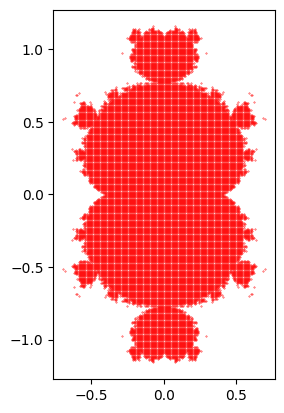

In [133]:
z_start = Complex(0,0)
res = 500
xmin, xmax = -2, 2
ymin, ymax = -2, 2
converging_C_00 = []
for x in linspace(xmin, xmax, res):
  for y in linspace(ymin, ymax, res):
    if converge(z_start, Complex(x,y), 40):
      converging_C_00.append(Complex(x,y))

plt.figure("Mandelbrot")
plt.gca().set_aspect(1.0)
plt.scatter([n.real for n in converging_C_00], [n.imag for n in converging_C_00], 0.1, 'red')
plt.show()

For rule: `(z*z + c)`; e.g. `C = Complex(0.0797, -0.6324)`

/tmp/ipython-input-129-2053401088.py:6: RuntimeWarning: overflow encountered in scalar power
  self.abs = math.sqrt(self.real ** 2 + self.imag ** 2)
/tmp/ipython-input-129-2053401088.py:20: RuntimeWarning: overflow encountered in scalar multiply
  return Complex(self.real * z.real - self.imag * z.imag, self.real * z.imag + self.imag * z.real)
/tmp/ipython-input-129-2053401088.py:20: RuntimeWarning: invalid value encountered in scalar subtract
  return Complex(self.real * z.real - self.imag * z.imag, self.real * z.imag + self.imag * z.real)
/tmp/ipython-input-129-2053401088.py:20: RuntimeWarning: invalid value encountered in scalar add
  return Complex(self.real * z.real - self.imag * z.imag, self.real * z.imag + self.imag * z.real)
/tmp/ipython-input-129-2053401088.py:20: RuntimeWarning: overflow encountered in scalar add
  return Complex(self.real * z.real - self.imag * z.imag, self.real * z.imag + self.imag * z.real)
/tmp/ipython-input-129-2053401088.py:6: RuntimeWarning: overflow en

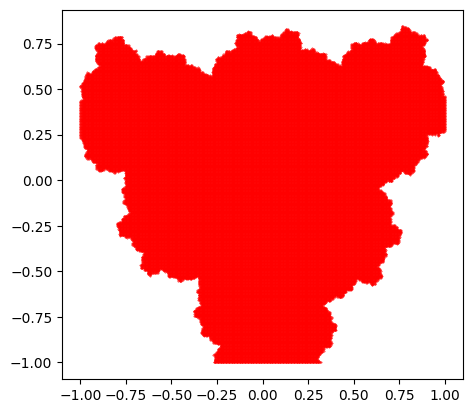

In [134]:
C = Complex(0.0797, -0.6324)
#C = Complex(0,0)
res = 500
xmin, xmax = -1, 1
ymin, ymax = -1, 1
converging_C_00 = []
for x in linspace(xmin, xmax, res):
  for y in linspace(ymin, ymax, res):
    if converge(Complex(x,y), C, 80):
      converging_C_00.append(Complex(x,y))

plt.figure(f"Julia C={C}")
plt.gca().set_aspect(1.0)
plt.scatter([n.real for n in converging_C_00], [n.imag for n in converging_C_00], 0.1, 'red')
plt.show()